# **Covid_19 Impact Analysis Exploratory Data Analysis**

OBJECTIVE OF PROJECT:


The first wave of covid-19 impacted the global economy as the world was never ready for the pandemic.

It resulted in a rise in cases, a rise in deaths, a rise in unemployment and a rise in poverty, resulting in an economic slowdown.

Here, I have analyzed the spread of Covid-19 cases and all the impacts of covid-19 on the economy.

## Importing libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Importing Dataset

In [147]:
df = pd.read_csv('transformed_data.csv')

## Data Information

In [148]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [149]:
df.tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491
50417,ZWE,Zimbabwe,2020-10-19,0.535,9.005405,5.442418,4.341855,16.514381,7.549491


In [150]:
df.shape

(50418, 9)

#### From this, we got to know that there are 50418 rows of data available and for each row, we have 9 different features or columns.

In [151]:
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


## DATA CLEANING

In [153]:
df.isnull().sum()


CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

In [154]:
df = df.dropna()
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


Removed the rows from the DataFrame that contain any missing (NaN) values.

In [155]:
df.isnull().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

In [156]:
df.dtypes


CODE        object
COUNTRY     object
DATE        object
HDI        float64
TC         float64
TD         float64
STI        float64
POP        float64
GDPCAP     float64
dtype: object

# DATA PREPROCESSING

In [157]:
df['infection_rate'] = df['TC'] / df['POP']
df.head()


,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,infection_rate
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0


Calculates the infection rate by dividing the total cases ('TC') by the population ('POP') for each row in the DataFrame and stored the result in a new 'infection_rate' column.

In [158]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44216 entries, 0 to 50417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            44216 non-null  object 
 1   COUNTRY         44216 non-null  object 
 2   DATE            44216 non-null  object 
 3   HDI             44216 non-null  float64
 4   TC              44216 non-null  float64
 5   TD              44216 non-null  float64
 6   STI             44216 non-null  float64
 7   POP             44216 non-null  float64
 8   GDPCAP          44216 non-null  float64
 9   infection_rate  44216 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.7+ MB


In [159]:
df.describe()


,HDI,TC,TD,STI,POP,GDPCAP,infection_rate
count,44216.000000,44216.000000,44216.000000,44216.000000,44216.000000,44216.000000,44216.000000
mean,0.720139,7.102211,3.729883,3.372483,16.018503,9.154138,0.440603
std,0.160902,3.676823,3.111586,1.534602,1.932219,1.753255,0.213317
min,0.000000,0.000000,0.000000,0.000000,10.548940,0.000000,0.000000
25%,0.601000,4.672829,0.000000,3.324316,14.901792,8.421078,0.308705
50%,0.752000,7.577634,3.663562,4.050219,16.127974,9.492126,0.484075
75%,0.847000,9.827902,5.966147,4.353884,17.326136,10.266848,0.605330
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379,0.811214


In [160]:
country = df.groupby(["COUNTRY"]).sum()
country.head()


<ipython-input-160-4970062c34ec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country = df.groupby(["COUNTRY"]).sum()


,HDI,TC,TD,STI,POP,GDPCAP,infection_rate
COUNTRY,,,,,,,
Afghanistan,146.412,2000.646094,1226.948181,896.603996,5138.306531,2204.339821,114.471557
Albania,176.625,1702.240756,929.368800,883.653354,3346.320751,2109.632744,114.455307
Algeria,221.676,2052.510847,1406.216387,939.379534,5173.314864,2804.947935,116.644396
Andorra,193.908,1465.828250,786.655112,787.230267,2543.629175,0.000000,130.238003
Angola,123.172,1203.978763,590.138675,871.874556,3669.286969,1837.821379,69.562152


So, this code takes the original DataFrame, groups it by the 'COUNTRY' column, and then sums up the values within each group. Basically, each row represents a unique country, and the columns contain the sums of the data for each country.

# **Exploratory Data Analysis**

Libraries -

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram -

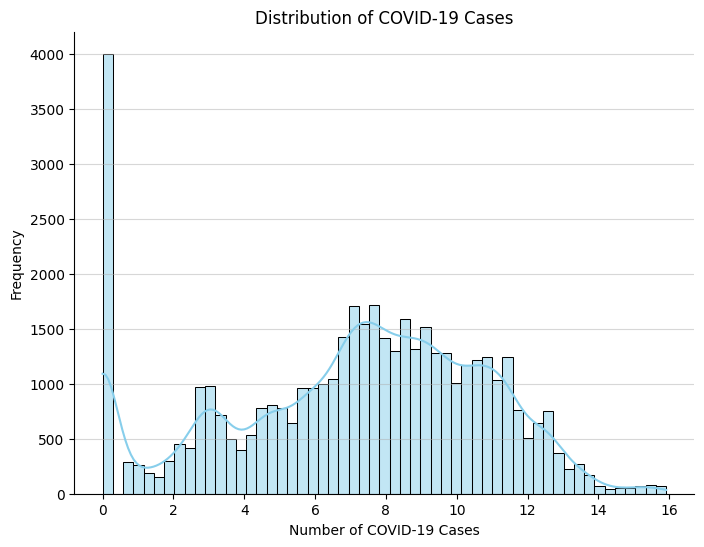

In [162]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TC'], kde=True, color='skyblue')
plt.xlabel('Number of COVID-19 Cases')
plt.ylabel('Frequency')
plt.title('Distribution of COVID-19 Cases')
plt.grid(axis='y', alpha=0.5)
sns.despine()
plt.show()


The plot shows a histogram of COVID-19 cases, with the x-axis representing the number of cases and the y-axis representing the frequency (how many times each number of cases appears in the dataset).

## Box Plot -

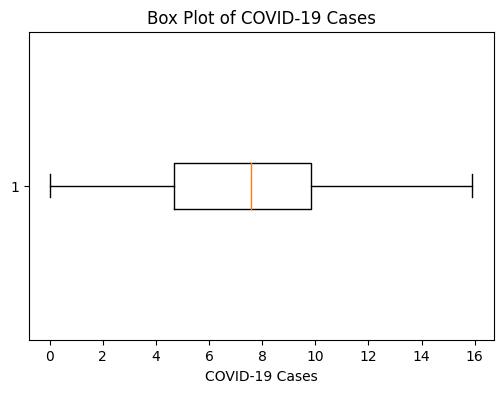

In [163]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['TC'], vert=False)
plt.xlabel('COVID-19 Cases')
plt.title('Box Plot of COVID-19 Cases')
plt.show()


The resulting horizontal box plot shows a box-and-whisker plot with the y-axis representing COVID-19 cases. The key elements of a box plot include:

- The box represents the interquartile range (IQR) of the data, with the middle line inside the box indicating the median (50th percentile).
- The "whiskers" extend from the edges of the box to the minimum and maximum values within a defined range (typically 1.5 times the IQR).
- Any data points outside of the whiskers are considered potential outliers and are plotted individually.

# **COVID-19 CASES & DEATHS ANALYSIS**

## 1. BAR PLOT OF COVID-19 CASES BY COUNTRY -


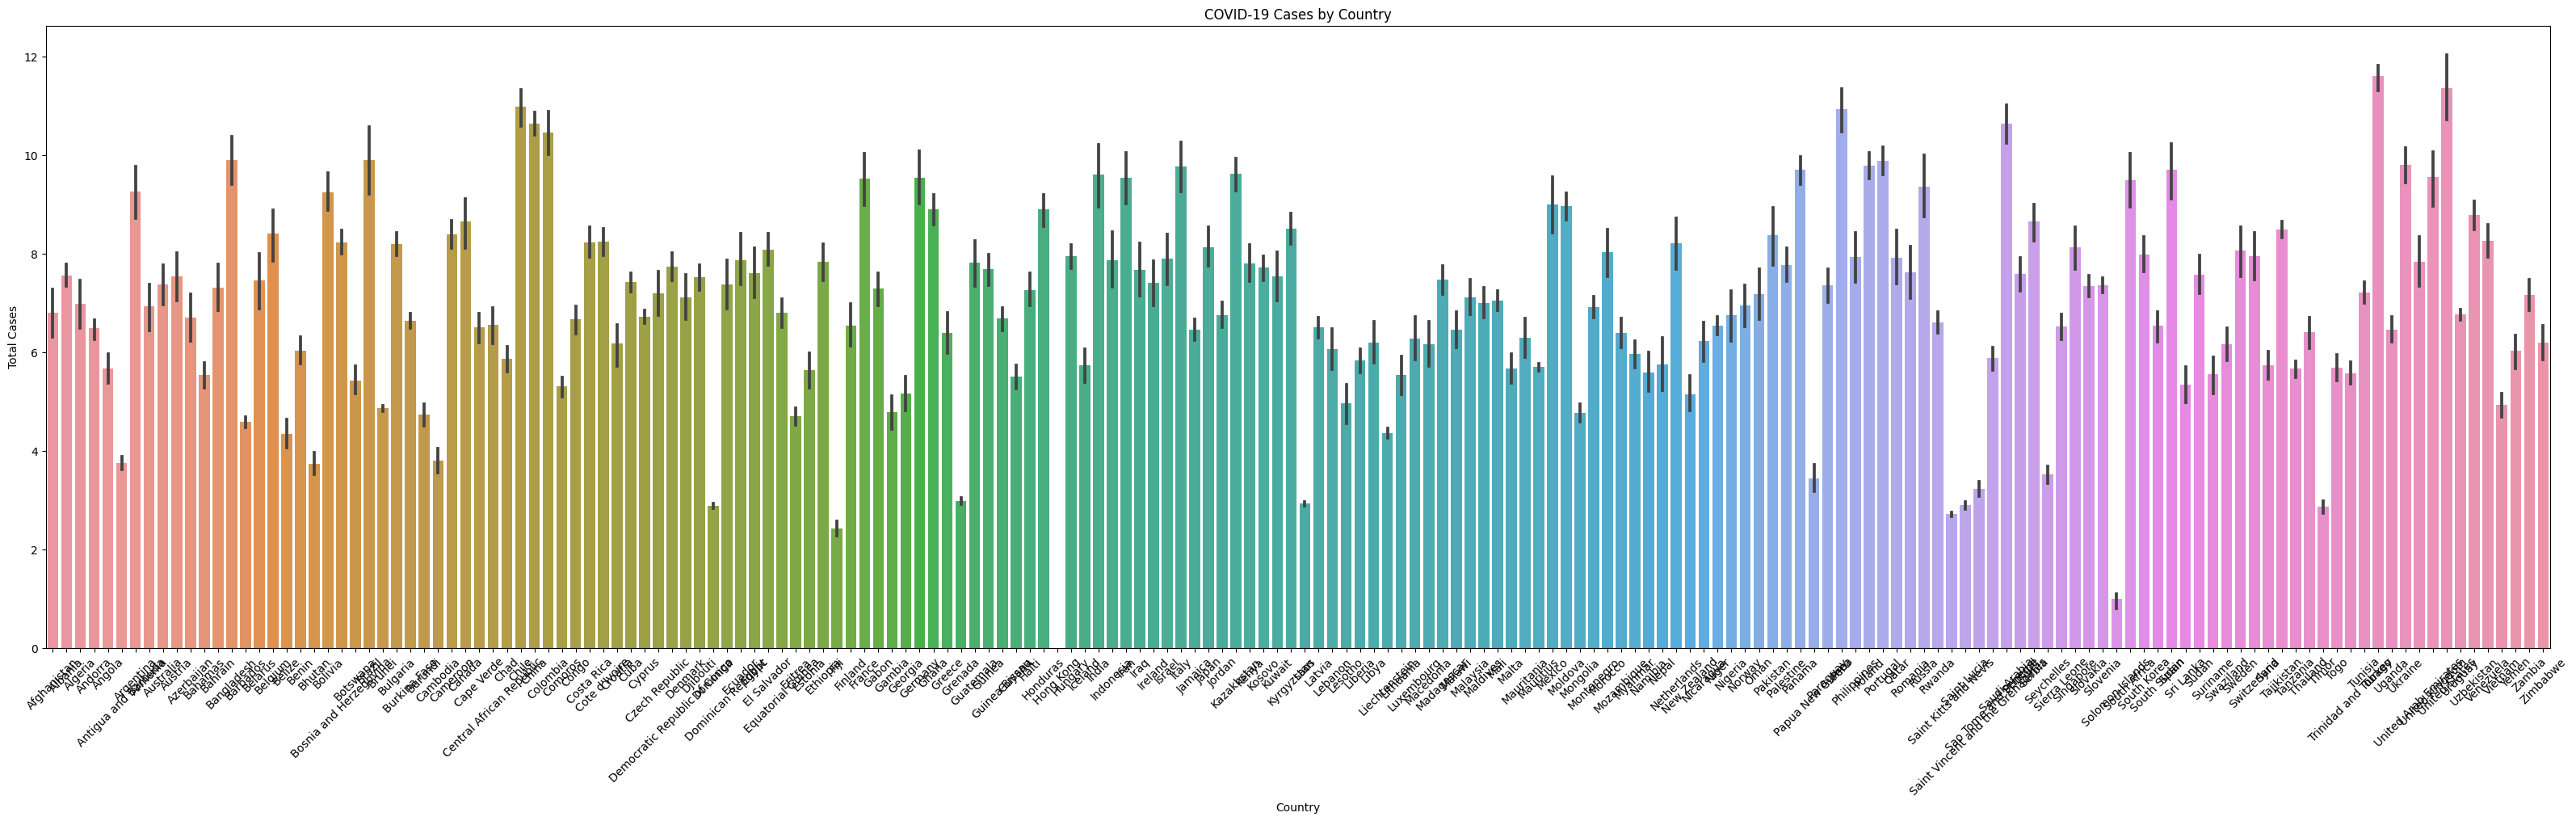

In [164]:
plt.figure(figsize=(40, 10))
sns.barplot(x='COUNTRY', y='TC', data=df)
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases by Country')
plt.xticks(rotation=45)
plt.show()

The resulting bar plot shows bars for each country, where the height of each bar represents the total number of COVID-19 cases for that country. It provides a visual comparison of the COVID-19 cases across different countries.

## 2. BAR PLOT OF COVID-19 DEATHS OF COUNTRY -

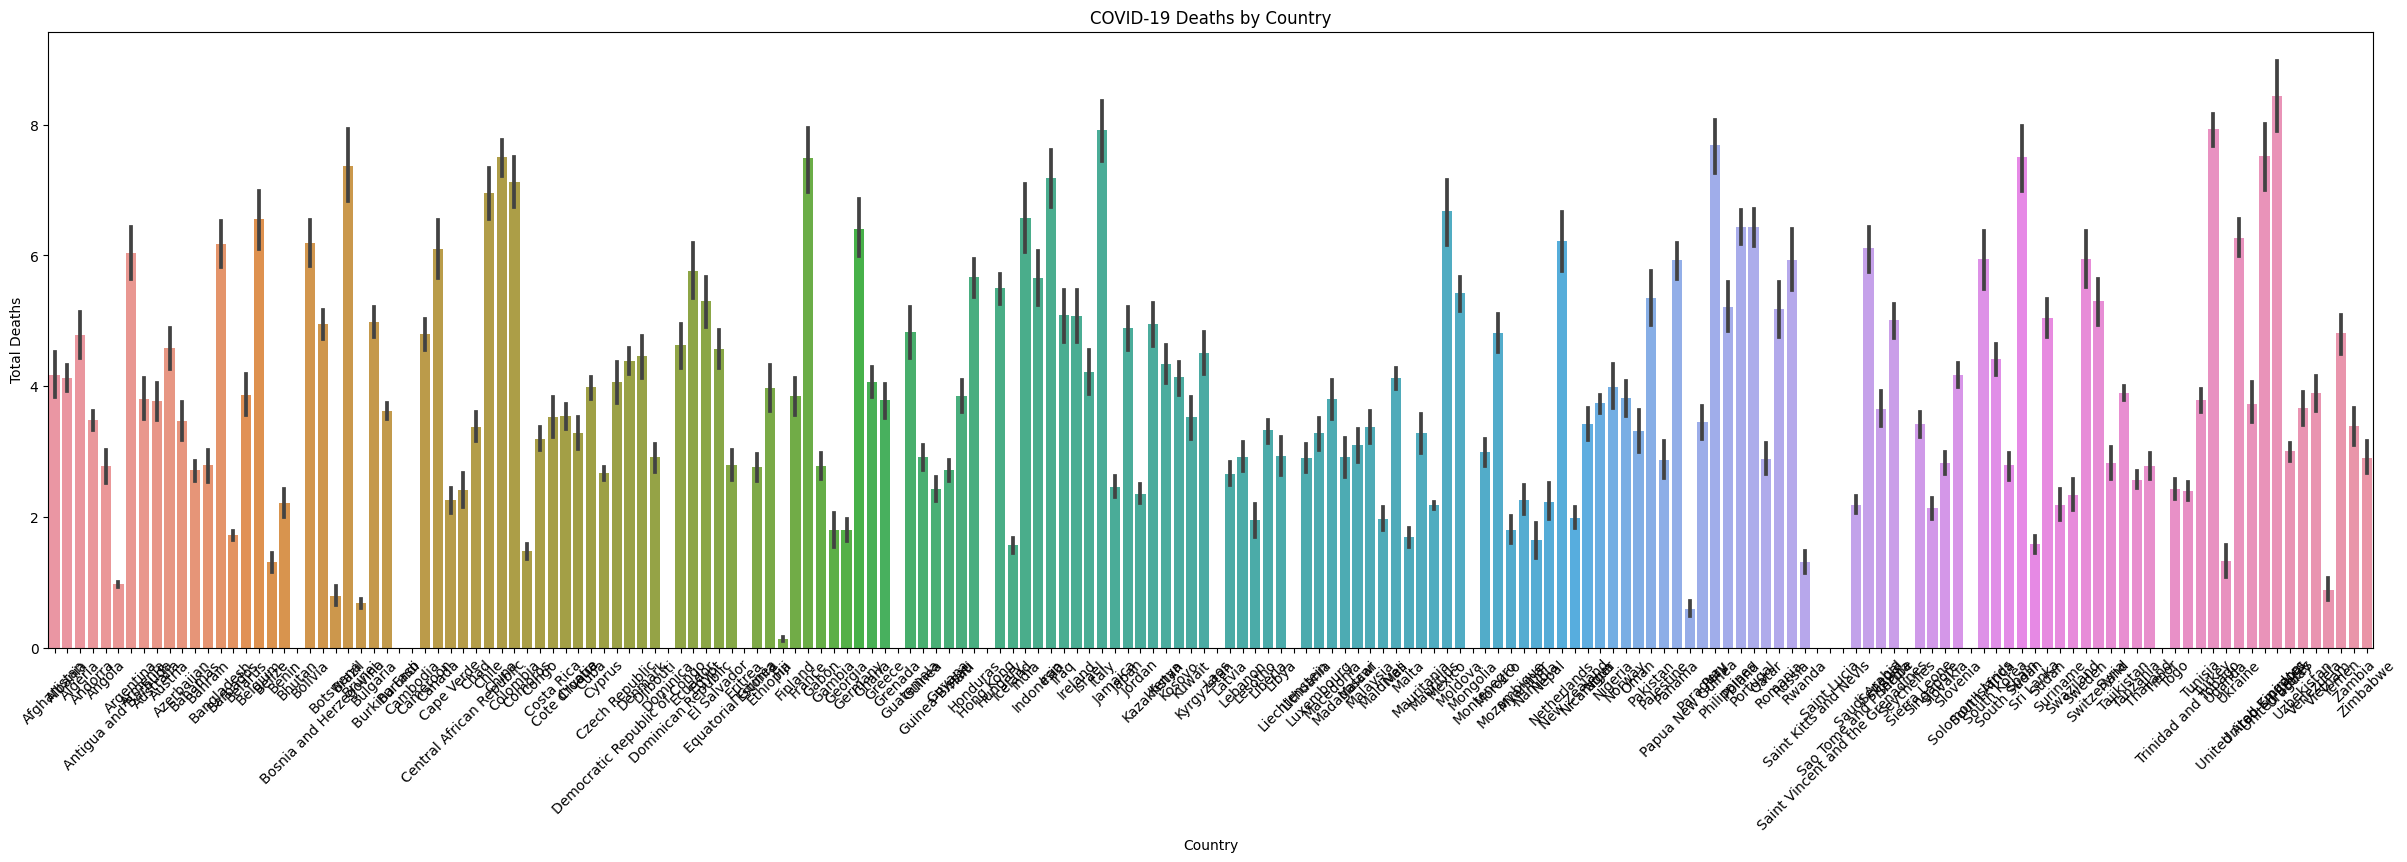

In [165]:
plt.figure(figsize=(30, 8))
sns.barplot(x='COUNTRY', y='TD', data=df)
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('COVID-19 Deaths by Country')
plt.xticks(rotation=45)
plt.show()


The resulting bar plot shows bars for each country, where the height of each bar represents the total number of COVID-19 deaths for that country. It provides a visual comparison of COVID-19 deaths across different countries.

## 3. MOST DEATHS COUNTRY WISE -

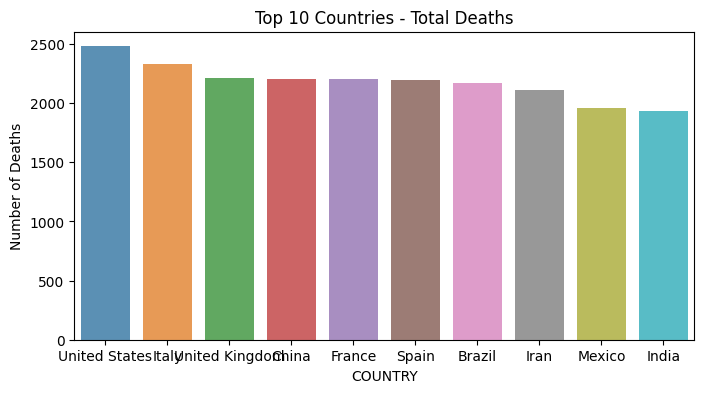

In [166]:
Country_death = df.groupby("COUNTRY")["TD"].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 4))
sns.barplot(x=Country_death.index, y=Country_death.values, alpha=0.8)
plt.title('Top 10 Countries - Total Deaths')
plt.ylabel('Number of Deaths')
plt.show()

The resulting bar plot shows the top 10 countries with the highest COVID-19 death counts. Each bar represents a country, and the height of the bar corresponds to the total number of COVID-19 deaths in that country. This type of visualization helps identify the countries that have been most severely affected by the pandemic in terms of mortality.

## 4. TOTAL CASES VS TOTAL DEATHS -

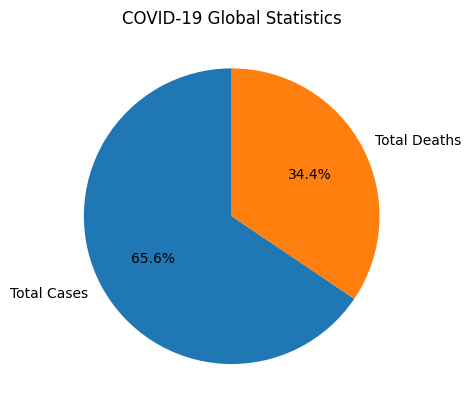

In [167]:
total_cases = df['TC'].sum()
total_deaths = df['TD'].sum()
data = [total_cases, total_deaths]
labels = ['Total Cases', 'Total Deaths']
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('COVID-19 Global Statistics')
plt.show()


The resulting pie chart visually represents the global distribution of COVID-19 cases and deaths. Each slice of the pie represents a category (total cases or total deaths), and the size of each slice corresponds to the proportion of that category relative to the whole.

## 5. LINE PLOT OF COVID-19 DEATHS OVER TIME -


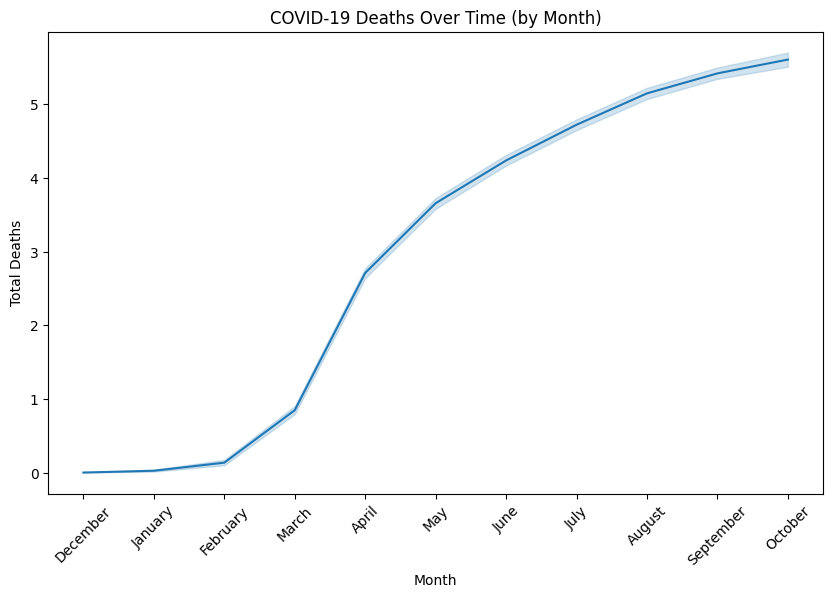

In [168]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Month'] = df['DATE'].dt.month_name()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TD', data=df)
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.title('COVID-19 Deaths Over Time (by Month)')
plt.xticks(rotation=45)
plt.show()


The resulting line plot shows the trend of COVID-19 deaths over time, specifically by month. Each point on the line represents the total number of deaths for a particular month.

# **COMPARISONS**

## 1. MOST POPULATED COUNTRIES CASES COMPARISON -

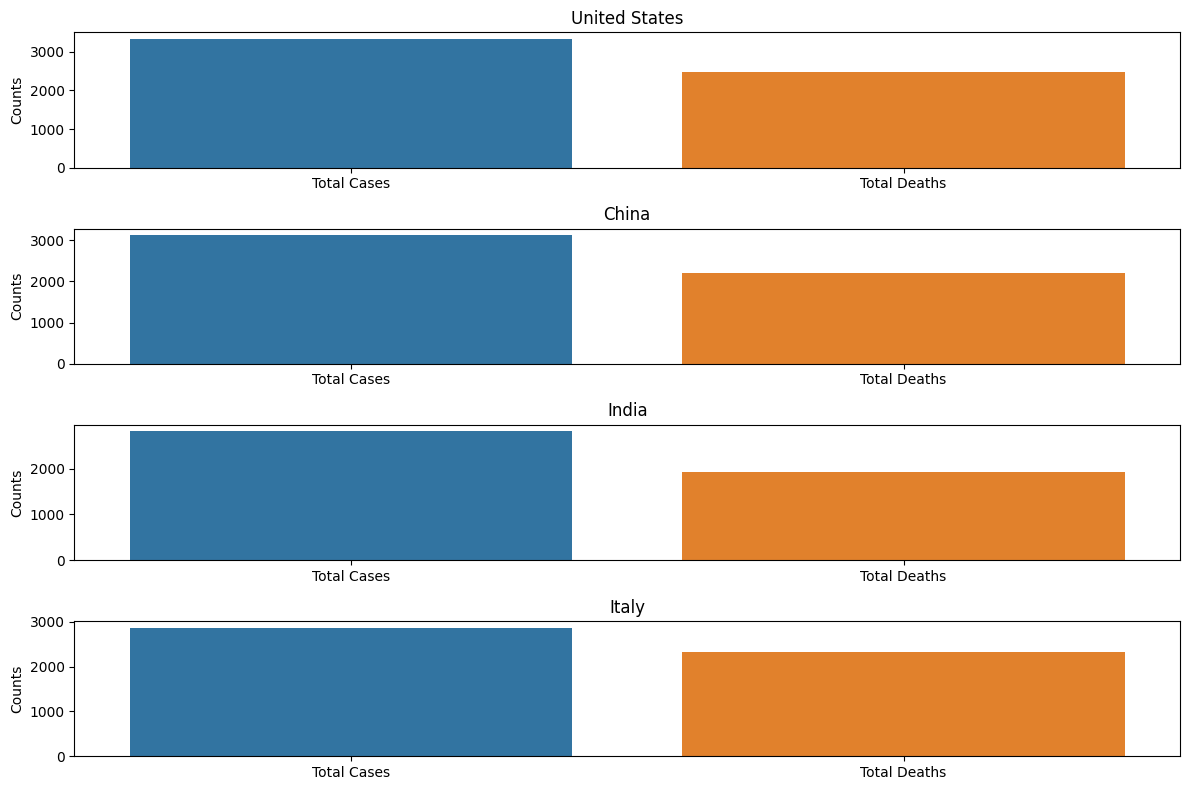

In [169]:
countries = ['United States', 'China', 'India','Italy']
fig, axes = plt.subplots(len(countries), 1, figsize=(12, 8))
for i, c in enumerate(countries):
 country_data = df[df['COUNTRY'] == c]
 total_cases = country_data['TC'].sum()
 total_deaths = country_data['TD'].sum()
 sns.barplot(x=['Total Cases', 'Total Deaths'], y=[total_cases, total_deaths], ax=axes[i])
 axes[i].set_title(c)
 axes[i].set_ylabel('Counts')
plt.tight_layout()
plt.show()


## 2. COUNTRIES WITH HIGHEST INFLECTION RATIO -


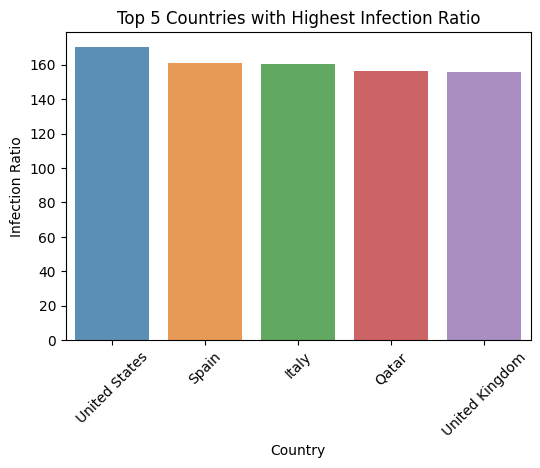

In [170]:
Country_death = df.groupby("COUNTRY")["infection_rate"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6, 4))
sns.barplot(x=Country_death.index, y=Country_death.values, alpha=0.8)
plt.xlabel('Country')
plt.ylabel('Infection Ratio')
plt.title(f'Top 5 Countries with Highest Infection Ratio')
plt.xticks(rotation=45)
plt.show()


The resulting bar plot shows the top 5 countries with the highest infection ratios, where each bar represents a country, and the height of the bar corresponds to the infection ratio for that country.

# Visualising the distributions of the variables using histograms

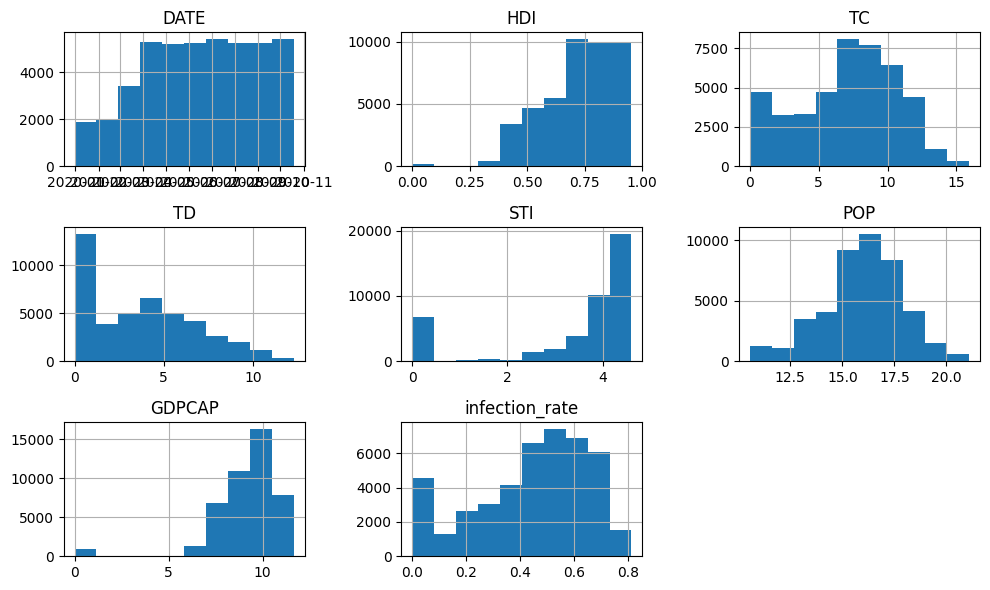

In [171]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


The resulting output shows a grid of histograms, with each histogram representing the distribution of values for a specific numerical column in the DataFrame.

## VISUALISE THE RELATIONSHIP BETWEEN HDI AND GDPCAP

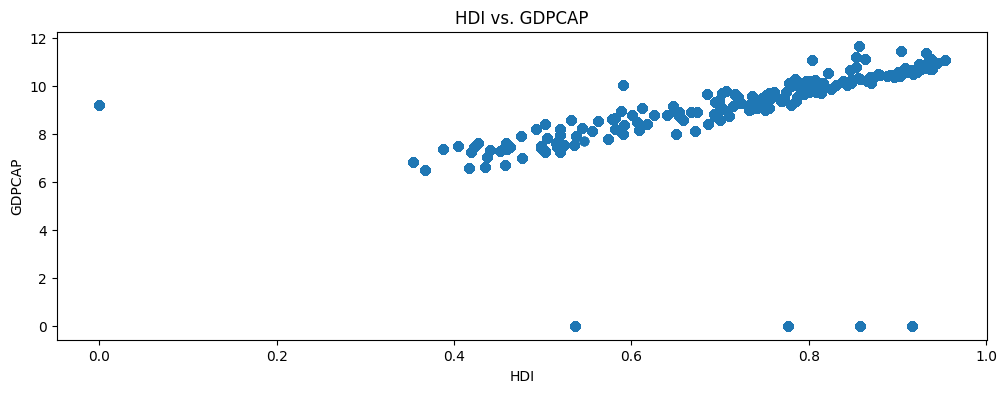

In [172]:
plt.figure(figsize=(12, 4))
plt.scatter(df['HDI'], df['GDPCAP'])
plt.xlabel('HDI')
plt.ylabel('GDPCAP')
plt.title('HDI vs. GDPCAP')
plt.show()

The resulting scatter plot shows individual points on a graph, where each point corresponds to a country's HDI on the x-axis and its GDPCAP on the y-axis. Scatter plots are useful for visualizing the relationship between two continuous variables, helping you identify patterns, correlations, or trends in the data.

# RELATIONSHIP BETWEEN TOTAL CASES AND DIFFERENT VARIABLES

Library -


In [173]:
from scipy.stats import pearsonr


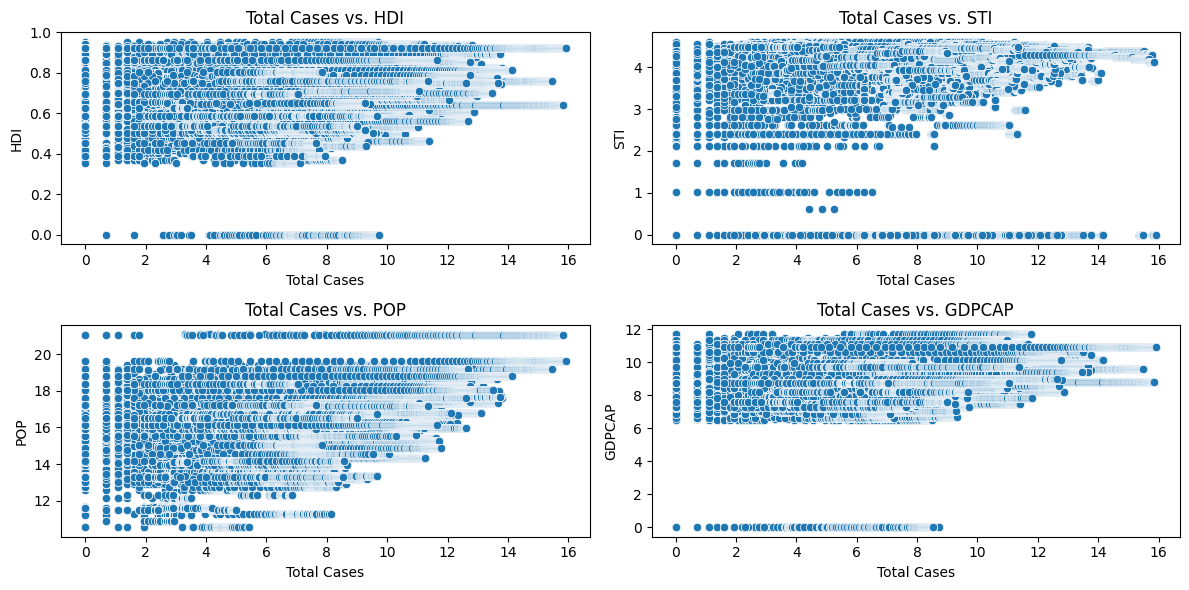

In [174]:
subset_df = df[['TC', 'TD', 'HDI', 'STI', 'POP', 'GDPCAP']]
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='TC', y='HDI')
plt.xlabel('Total Cases')
plt.ylabel('HDI')
plt.title('Total Cases vs. HDI')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='TC', y='STI')
plt.xlabel('Total Cases')
plt.ylabel('STI')
plt.title('Total Cases vs. STI')
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='TC', y='POP')
plt.xlabel('Total Cases')
plt.ylabel('POP')
plt.title('Total Cases vs. POP')
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='TC', y='GDPCAP')
plt.xlabel('Total Cases')
plt.ylabel('GDPCAP')
plt.title('Total Cases vs. GDPCAP')
plt.tight_layout()
plt.show()


The resulting set of scatter plots allows us to visualize and analyze the relationships between 'Total Cases' and each of the four variables: 'HDI', 'STI', 'POP', and 'GDPCAP'.

# VISUALISING CORRELATIONS USING HEATMAP

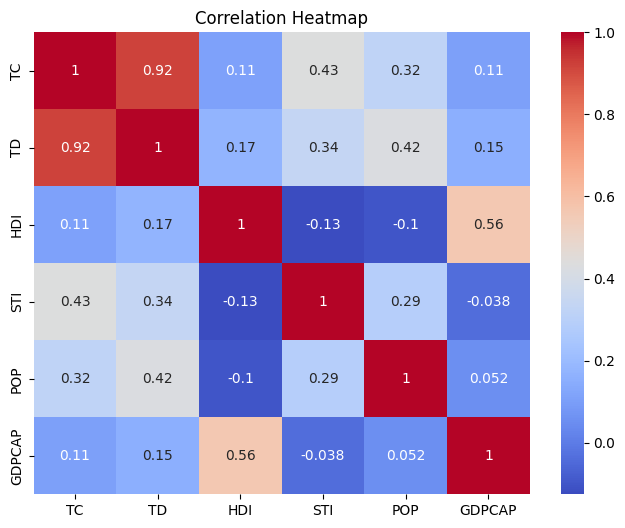

Correlation between Total Cases and HDI: 0.108
Correlation between Total Cases and STI: 0.433
Correlation between Total Cases and POP: 0.320
Correlation between Total Cases and GDPCAP: 0.106
Correlation between Total Deaths and HDI: 0.171
Correlation between Total Deaths and STI: 0.338
Correlation between Total Deaths and POP: 0.424
Correlation between Total Deaths and GDPCAP: 0.153


In [175]:
correlation_matrix = subset_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
tc_hdi_corr, _ = pearsonr(df['TC'], df['HDI'])
tc_sti_corr, _ = pearsonr(df['TC'], df['STI'])
tc_pop_corr, _ = pearsonr(df['TC'], df['POP'])
tc_gdpcap_corr, _ = pearsonr(df['TC'], df['GDPCAP'])
td_hdi_corr, _ = pearsonr(df['TD'], df['HDI'])
td_sti_corr, _ = pearsonr(df['TD'], df['STI'])
td_pop_corr, _ = pearsonr(df['TD'], df['POP'])
td_gdpcap_corr, _ = pearsonr(df['TD'], df['GDPCAP'])
print(f"Correlation between Total Cases and HDI: {tc_hdi_corr:.3f}")
print(f"Correlation between Total Cases and STI: {tc_sti_corr:.3f}")
print(f"Correlation between Total Cases and POP: {tc_pop_corr:.3f}")
print(f"Correlation between Total Cases and GDPCAP: {tc_gdpcap_corr:.3f}")
print(f"Correlation between Total Deaths and HDI: {td_hdi_corr:.3f}")
print(f"Correlation between Total Deaths and STI: {td_sti_corr:.3f}")
print(f"Correlation between Total Deaths and POP: {td_pop_corr:.3f}")
print(f"Correlation between Total Deaths and GDPCAP: {td_gdpcap_corr:.3f}")

- The heatmap provides a visual representation of the correlation between different variables in the dataset. Darker colors indicate stronger correlations (positive or negative), while lighter colors indicate weaker or no correlations.

- These correlation coefficients help quantify the strength and direction (positive or negative) of the linear relationships between pairs of variables. A correlation coefficient close to 1 or -1 indicates a strong linear relationship, while a value close to 0 suggests a weak or no linear relationship.







# GDPCAP PERCENT CHANGE DURING COVID-19 PANDEMIC

In [176]:
df['GDPCAP_change'] = (df['GDPCAP'] - df['GDPCAP'].mean()) / df['GDPCAP'].mean() * 100

So, 'GDPCAP_change' will contain values that represent the percentage change of each 'GDPCAP' value compared to the mean 'GDPCAP' value. Positive values indicate an above-average value, while negative values indicate a below-average value.

In [177]:
gdp_change = df.groupby('COUNTRY')['GDPCAP_change'].sum().sort_values(ascending=False)
print(gdp_change)


COUNTRY
Qatar                        8078.102994
Luxembourg                   7386.388472
Singapore                    7073.837979
Ireland                      6305.461850
United Arab Emirates         6303.467054
                                ...     
Central African Republic    -6334.672133
Syria                      -21100.000000
Cuba                       -21900.000000
Liechtenstein              -22400.000000
Andorra                    -22600.000000
Name: GDPCAP_change, Length: 182, dtype: float64


'COUNTRY': This column likely contains the names of different countries or regions.

'GDPCAP_change': This column contains numerical values that represent the percentage change in GDPCAP for each country relative to the mean GDPCAP value.

Interpretation:

- Positive Values: Countries with positive values in the 'GDPCAP_change' column have experienced an above-average increase in GDPCAP compared to the mean. ( Economic growth )

- Negative Values: Countries with negative values in the 'GDPCAP_change' column have experienced a decrease in GDPCAP below the mean. ( Economic decline )

- Magnitude: The magnitude of the percentage change indicates the extent of the change relative to the mean. Larger positive values represent more substantial economic growth, while larger negative values represent more significant economic decline.

In [178]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,infection_rate,Month,GDPCAP_change
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,December,-18.09437
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437


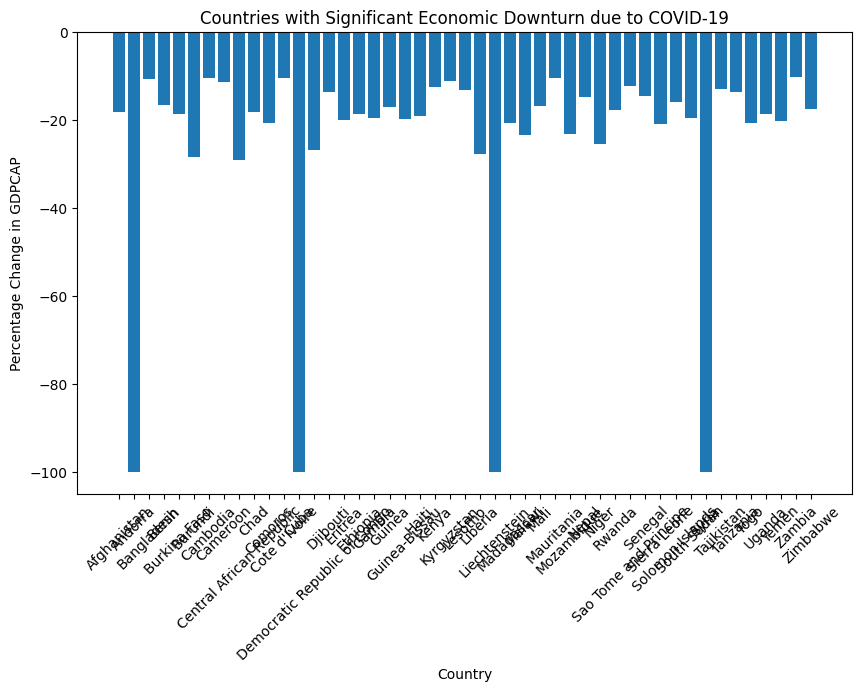

           COUNTRY    HDI       STI        POP    GDPCAP  GDPCAP_change
0      Afghanistan  0.498  0.000000  17.477233  7.497754     -18.094370
1      Afghanistan  0.498  0.000000  17.477233  7.497754     -18.094370
2      Afghanistan  0.498  0.000000  17.477233  7.497754     -18.094370
3      Afghanistan  0.498  0.000000  17.477233  7.497754     -18.094370
4      Afghanistan  0.498  0.000000  17.477233  7.497754     -18.094370
...            ...    ...       ...        ...       ...            ...
50413     Zimbabwe  0.535  4.341855  16.514381  7.549491     -17.529202
50414     Zimbabwe  0.535  4.341855  16.514381  7.549491     -17.529202
50415     Zimbabwe  0.535  4.341855  16.514381  7.549491     -17.529202
50416     Zimbabwe  0.535  4.341855  16.514381  7.549491     -17.529202
50417     Zimbabwe  0.535  4.341855  16.514381  7.549491     -17.529202

[9994 rows x 6 columns]


In [179]:
threshold = -10 # Defining a threshold for percentage decrease in GDPCAP
downturn_countries = df[df['GDPCAP_change'] < threshold]
plt.figure(figsize=(10, 6))
plt.bar(downturn_countries['COUNTRY'], downturn_countries['GDPCAP_change'])
plt.xlabel('Country')
plt.ylabel('Percentage Change in GDPCAP')
plt.title('Countries with Significant Economic Downturn due to COVID-19')
plt.xticks(rotation=45)
plt.show()
summary_stats = downturn_countries[['COUNTRY', 'HDI', 'STI', 'POP', 'GDPCAP', 'GDPCAP_change']]
print(summary_stats)


The bar plot helps visualize which countries have seen significant economic downturns due to COVID-19, and the summary statistics provide additional details about these countries' economic and social indicators.

# TOP 10 COUNTRIES WHOSE GDP SUFFERED THE MOST

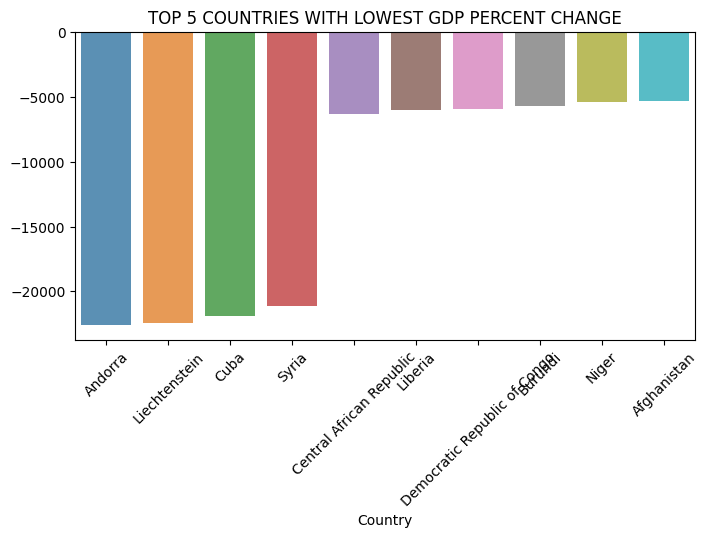

In [180]:
Country_death = df.groupby("COUNTRY")["GDPCAP_change"].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=Country_death.index, y=Country_death.values, alpha=0.8)
plt.xlabel('Country')
plt.ylabel('')
plt.title(f'TOP 5 COUNTRIES WITH LOWEST GDP PERCENT CHANGE')
plt.xticks(rotation=45)
plt.show()

# COUNTRIES WHOSE STI INCREASED IN COVID TIMES


In [181]:
df['STI_change'] = (df['STI'] - df['STI'].mean()) / df['STI'].mean() * 100


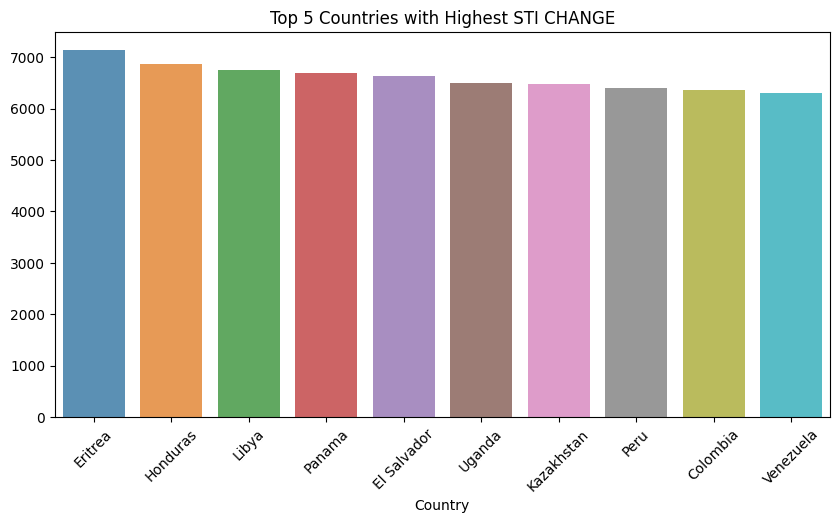

In [182]:
Country_sti = df.groupby("COUNTRY")["STI_change"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=Country_sti.index, y=Country_sti.values, alpha=0.8)
plt.xlabel('Country')
plt.ylabel('')
plt.title(f'Top 5 Countries with Highest STI CHANGE')
plt.xticks(rotation=45)
plt.show()

# HDI PERCENT CHANGE DURING COVID-19 PANDEMIC


In [183]:
df['HDI_change'] = (df['HDI'] - df['HDI'].mean()) / df['HDI'].mean() * 100
df.head()


,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,infection_rate,Month,GDPCAP_change,STI_change,HDI_change
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,December,-18.09437,-100.0,-30.846638
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437,-100.0,-30.846638
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437,-100.0,-30.846638
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437,-100.0,-30.846638
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,January,-18.09437,-100.0,-30.846638


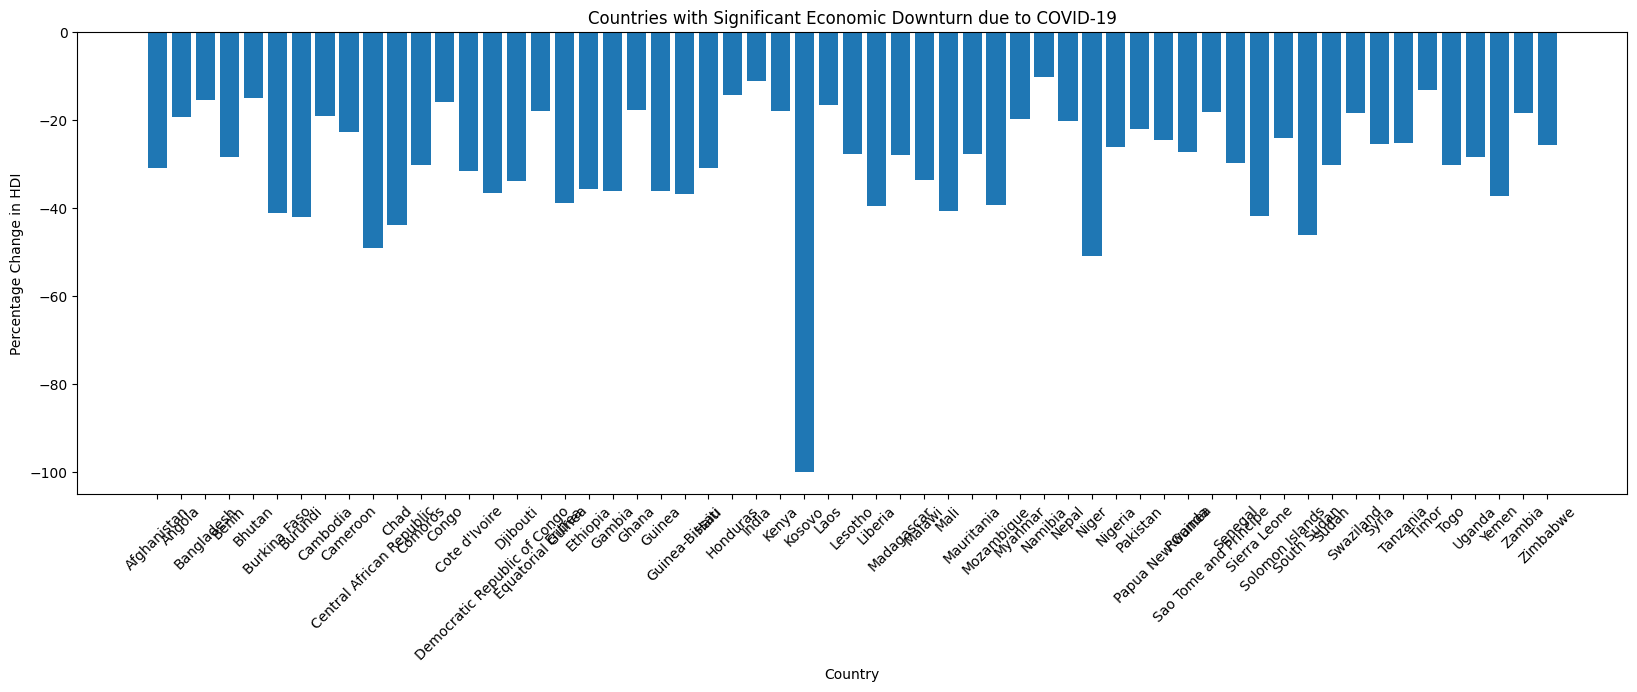

In [184]:
threshold = -10 # Defining a threshold for percentage decrease in GDPCAP
downturn_countries = df[df['HDI_change'] < threshold]
plt.figure(figsize=(20, 6))
plt.bar(downturn_countries['COUNTRY'], downturn_countries['HDI_change'])
plt.xlabel('Country')
plt.ylabel('Percentage Change in HDI')
plt.title('Countries with Significant Economic Downturn due to COVID-19')
plt.xticks(rotation=45)
plt.show()


This code focuses on visualizing the percentage change in HDI for countries that have experienced a significant decrease below the specified threshold. It helps identify and highlight countries where the Human Development Index has been significantly impacted by the economic effects of COVID-19.

# TOP 10 COUNTRIES WHOSE HDI SUFFERED THE MOST


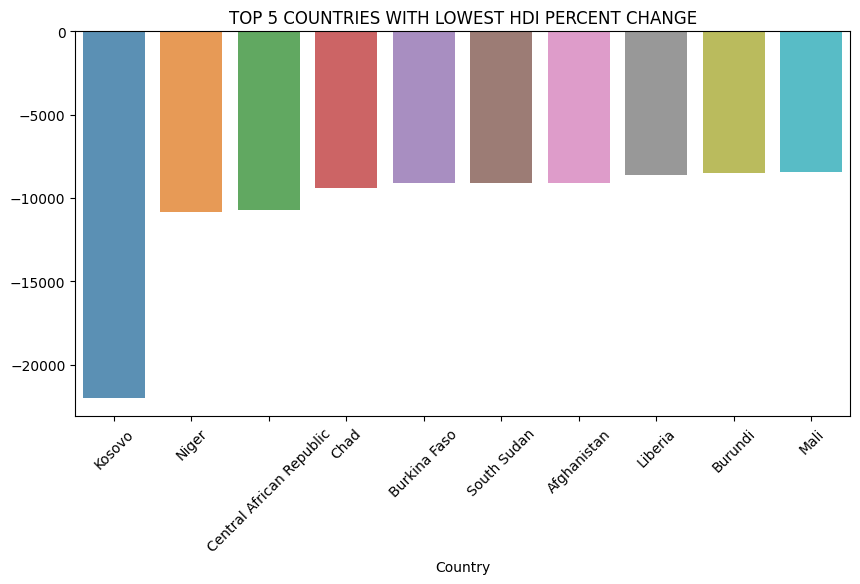

In [185]:
Country_death = df.groupby("COUNTRY")["HDI_change"].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=Country_death.index, y=Country_death.values, alpha=0.8)
plt.xlabel('Country')
plt.ylabel('')
plt.title(f'TOP 5 COUNTRIES WITH LOWEST HDI PERCENT CHANGE')
plt.xticks(rotation=45)
plt.show()

### Thus, The COVID-19 Impact Analysis exploratory data analysis (EDA) project has provided valuable insights into the global economic and health impact of the COVID-19 pandemic. The primary objective was to understand how the first wave of COVID-19 affected the world and its implications for various aspects of society and the economy.

### Overall, this EDA project has deepened our understanding of how the COVID-19 pandemic affected different countries, economies, and populations. It underscores the importance of considering a range of factors, from healthcare infrastructure to socio-economic conditions, when analyzing the impact of a global crisis like COVID-19. The findings can inform future preparedness efforts and policy decisions aimed at mitigating the effects of such events.